# In Depth: Linear Regression
Just as naive Bayes is a good starting point for classification tasks, linear regression models are
a good starting point for regression tasks. Such models are popular because they can
be fit very quickly, and are very interpretable. You are probably familiar with the sim‐
plest form of a linear regression model (i.e., fitting a straight line to data), but such
models can be extended to model more complicated data behavior.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. A
straight-line fit is a model of the form y = ax + b where a is commonly known as the
slope, and b is commonly known as the intercept.
Consider the following data, which is scattered about a line with a slope of 2 and an
intercept of –5

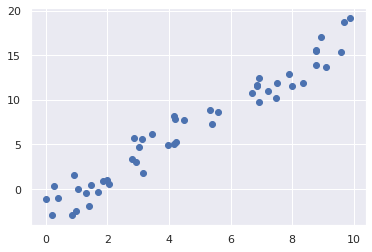

In [2]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5*rng.random(50)
plt.scatter(x,y)

We can use Scikit-Learn’s LinearRegression estimator to fit this data and construct
the best-fit line

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)

LinearRegression()

In [5]:
xfit=np.linspace(0,10,1000)
yfit=model.predict(xfit[:,np.newaxis])

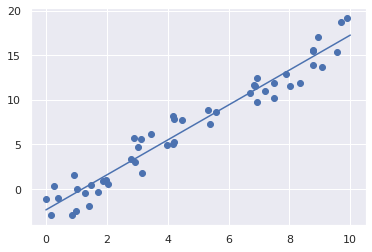

In [6]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

**The slope and intercept of the data are contained in the model’s fit parameters, which
in Scikit-Learn are always marked by a trailing underscore. Here the relevant parame‐
ters are coef_ and intercept_:**

In [7]:
print(f"Model slope: {model.coef_}\nModel Intercept: {model.intercept_}")

Model slope: [1.95884878]
Model Intercept: -2.3317351395043504


We see that the results are very close to the inputs, as we might hope.
The LinearRegression estimator is much more capable than this, however—in addi‐
tion to simple straight-line fits, it can also handle multidimensional linear models of
the form:  
$$y = a_0 + a_1x_1 + a_2x_2 + ⋯$$  
where there are multiple x values. Geometrically, this is akin to fitting a plane to
points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visu‐
alize, but we can see one of these fits in action by building some example data, using
NumPy’s matrix multiplication operator:

In [8]:
X=10*rng.rand(100,3)
y=0.5+np.dot(X,[1.5,-2.,1.])
X

array([[3.26644902e+00, 5.27058102e+00, 8.85942099e+00],
       [3.57269760e+00, 9.08535151e+00, 6.23360116e+00],
       [1.58212428e-01, 9.29437234e+00, 6.90896918e+00],
       [9.97322850e+00, 1.72340508e+00, 1.37135750e+00],
       [9.32595463e+00, 6.96818161e+00, 6.60001727e-01],
       [7.55463053e+00, 7.53876188e+00, 9.23024536e+00],
       [7.11524759e+00, 1.24270962e+00, 1.98801338e-01],
       [2.62109869e-01, 2.83064880e-01, 2.46211068e+00],
       [8.60027949e+00, 5.38831064e+00, 5.52821979e+00],
       [8.42030892e+00, 1.24173315e+00, 2.79183679e+00],
       [5.85759271e+00, 9.69595748e+00, 5.61030219e+00],
       [1.86472894e-01, 8.00632673e+00, 2.32974274e+00],
       [8.07105196e+00, 3.87860644e+00, 8.63541855e+00],
       [7.47121643e+00, 5.56240234e+00, 1.36455226e+00],
       [5.99176895e-01, 1.21343456e+00, 4.45518785e-01],
       [1.07494129e+00, 2.25709339e+00, 7.12988980e+00],
       [5.59716982e+00, 1.25559802e-01, 7.19742797e-01],
       [9.67276330e+00, 5.68100

In [9]:
y

array([  3.71793247,  -6.07805546, -10.94245686,  13.38439009,
         1.21257044,   5.98466738,   8.88625348,   2.78914572,
         8.15201773,  13.43883387,  -4.4952237 , -12.90320137,
        13.4847836 ,   1.94657222,  -0.58258499,   4.72811497,
         9.36437792,   5.68006806,  -8.6373361 ,  -1.71172786,
         0.42187929,   9.98464762,  -2.11327545,  12.57168491,
         7.10283703,   0.94455417,   0.39051363, -10.73713611,
        -9.75602197,   8.84658673,  10.48088938,   3.24607409,
         2.18981544,   1.29825431,   5.30284821,   1.19912956,
        -0.03319118,  12.73311979,  -7.37180789,  -1.67256645,
        -2.18835921,  15.14870215,   0.10091746,  10.34674762,
        11.66721206,  15.11080319,  -5.98961731,   4.17628834,
         0.61740769,   2.40754625, -15.26334946,  11.30088914,
        -0.58508858,   2.8852032 ,   6.50988216,  -3.5668215 ,
         2.03011012,  -2.87515546,   3.53671222,   8.00997838,
         2.25033334,   8.05476933,  -1.90261681,   8.82

In [10]:
model.fit(X,y)
print(f"Model slope: {model.coef_}\nModel Intercept: {model.intercept_}")

Model slope: [ 1.5 -2.   1. ]
Model Intercept: 0.4999999999999898


**Here the y data is constructed from three random x values, and the linear regression
recovers the coefficients used to construct the data.**

## Basis Function Regression
One trick you can use to adapt linear regression to nonlinear relationships between
variables is to transform the data according to basis functions.

**Polynomial basis functions**
This polynomial projection is useful enough that it is built into Scikit-Learn, using
the PolynomialFeatures transformer:

In [11]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly=PolynomialFeatures(3,include_bias=True)
poly.fit_transform(x[:,None])

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a
three-dimensional array by taking the exponent of each value. This new, higher-
dimensional data representation can then be plugged into a linear regression.

In [13]:
from sklearn.pipeline import make_pipeline
poly_model= make_pipeline(PolynomialFeatures(7),LinearRegression())

In [14]:
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)
poly_model.fit(x[:,np.newaxis],y)
yfit=poly_model.predict(xfit[:,np.newaxis])

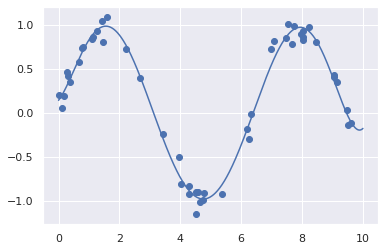

In [15]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

Our linear model, through the use of 7th-order polynomial basis functions, can pro‐
vide an excellent fit to this nonlinear data!

**Gaussian basis functions**
Of course, other basis functions are possible. For example, one useful pattern is to fit
a model that is not a sum of polynomial bases, but a sum of Gaussian bases.

Gaussian basis functions are not built into Scikit-Learn, but we can write a custom
transformer that will create them,

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    @staticmethod
    def _gauss_basis(x,y,width,axis=None):
        arg=(x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    
    def fit(self,X,y=None):
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_=self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,
                                self.width_, axis=1)
    

gauss_model=make_pipeline(GaussianFeatures(20), 
                         LinearRegression())

gauss_model.fit(x[:,np.newaxis],y)
yfit=gauss_model.predict(xfit[:,np.newaxis])


(0.0, 10.0)

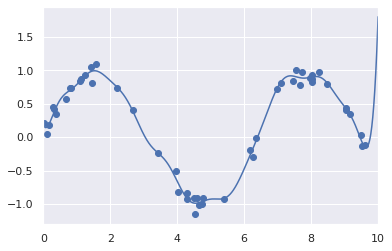

In [17]:
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)

## Regularization
The introduction of basis functions into our linear regression makes the model much
more flexible, but it also can very quickly lead to overfitting.
For example,
if we choose too many Gaussian basis functions, we end up with results that don’t
look so good

(-2.5, 2.5)

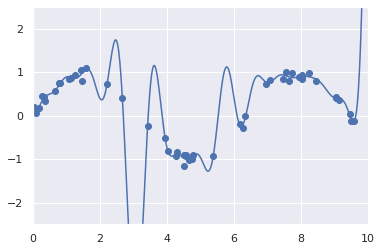

In [20]:

gauss_model=make_pipeline(GaussianFeatures(30), 
                         LinearRegression())

gauss_model.fit(x[:,np.newaxis],y)
yfit=gauss_model.predict(xfit[:,np.newaxis])


plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)
plt.ylim(-2.5,2.5)

With the data projected to the 30-dimensional basis, the model has far too much flex‐
ibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with
respect to their locations..

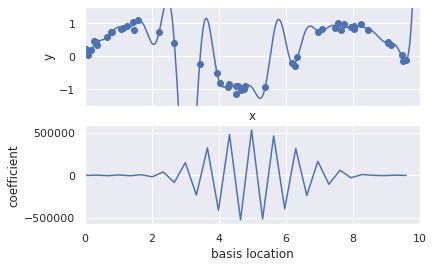

In [21]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',
              xlim=(0, 10))
    
    
model=make_pipeline(GaussianFeatures(30),LinearRegression())
basis_plot(model)

This is typical overfitting behavior when basis functions overlap: the coeffi‐
cients of adjacent basis functions blow up and cancel each other out. We know that
such behavior is problematic, and it would be nice if we could limit such spikes
explicitly in the model by penalizing large values of the model parameters. Such a
penalty is known as regularization, and comes in several forms.

### Ridge regression (L2 regularization)
Perhaps the most common form of regularization is known as ridge regression or L2
regularization, sometimes also called Tikhonov regularization. This proceeds by penal‐
izing the sum of squares (2-norms) of the model coefficients; in this case, the penalty
on the model fit would be:

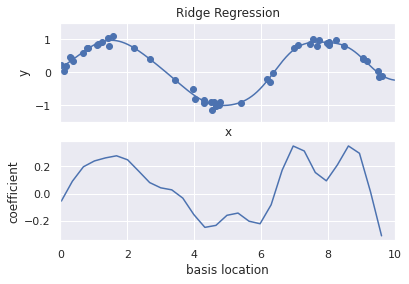

In [24]:
from sklearn.linear_model import Ridge
model=make_pipeline(GaussianFeatures(30),
                   Ridge(alpha=0.1))
basis_plot(model,title="Ridge Regression")

The $α$ parameter is essentially a knob controlling the complexity of the resulting model. In the $limit α 0$, we recover the standard linear regression result; in the
$limit α ∞$, all model responses will be suppressed. One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more compu‐
tational cost than the original linear regression model

### Lasso regularization (L1)
Another very common type of regularization is known as lasso, and involves penaliz‐
ing the sum of absolute values (1-norms) of regression coefficients:
Though this is conceptually very similar to ridge regression, the results can differ sur‐
prisingly: for example, due to geometric reasons lasso regression tends to favor sparse
models where possible; that is, it preferentially sets model coefficients to exactly zero.

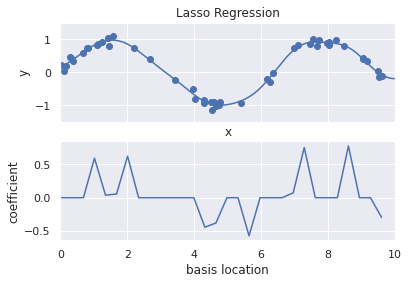

In [25]:
from sklearn.linear_model import Lasso
model=make_pipeline(GaussianFeatures(30),
                   Lasso(alpha=0.001))
basis_plot(model, title="Lasso Regression")

**With the lasso regression penalty, the majority of the coefficients are exactly zero,
with the functional behavior being modeled by a small subset of the available basis
functions. As with ridge regularization, the α parameter tunes the strength of the
penalty, and should be determined via, for example, cross-validation**